In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load dataset
data = pd.read_json('katalagu-indonesia-2000an.json')

In [3]:
# Menghitung jumlah NaN di setiap kolom
nan_count = data.isna().sum()

# Menghitung persentase NaN di setiap kolom
nan_percentage = (data.isna().sum() / len(data)) * 100

# Membuat DataFrame baru dengan jumlah dan persentase NaN
nan_summary = pd.DataFrame({
    'Jumlah NaN': nan_count,
    'Persentase NaN': nan_percentage
})

# Menampilkan hasil
print(nan_summary)

        Jumlah NaN  Persentase NaN
lyrics           0             0.0


In [4]:
def extract_lyric(entry):
    if isinstance(entry, dict) and 'lyric' in entry:
        print(entry['lyric']) 
        return entry['lyric'].lower()
    elif isinstance(entry, str):
        print(entry)  
        return entry.lower()
    else:
        print("Empty or invalid entry")  

data['cleaned_lyrics'] = data['lyrics'].apply(extract_lyric)


Disini kau dan Aku
Terbiasa Bersama
Menjalani Kasih Sayang
Bahagia Ku Dengan Mu...
Pernahkah Kau Menguntai
Hari Paling Indah
Ku Ukir Nama Kita Berdua
Disini Surga Kita
Bila Kita Mencintai Yang Lain
Mungkinkah Hati Ini Akan Tegar
Sebisa Mungkin Tak Akan Pernah
Sayang Ku Akan Hilang
If you love somebody
Could we be this strong
I will fight to win
Our love will conquer all
Wouldn't risk my love
Even just one night
Our love will stay in my heart
My heart
Pernahkah Kau Menguntai
Hari Paling Indah
Ku Ukir Nama Kita Berdua
Disini Surga Kita
Bila KIta Mencintai Yang Lain
Mungkinkah Hati Ini Akan Tegar
Sebisa Mungkin Tak Akan Pernah
Sayang Ku Akan Hilang..
If you love somebody
Could we be this strong
I will fight to win
Our love will conquer all
Wouldn't risk my love
Even just one night
Our love will stay in my heart
My heart
Pernahkah kau menguntai
Hari paling indah
Ku ukir nama kita berdua
Disini surga kita
Bila kita mencintai yg lain
Mungkin kah hati ini akan tegar
Sebisa mungkin tak akan pe

In [5]:
def clean_lyric(lyric):
    import re
    cleaned = re.sub(r'\[.*?\]', '', lyric).strip()
    print(cleaned) 
    return cleaned

data['cleaned_lyrics'] = data['cleaned_lyrics'].apply(clean_lyric)


disini kau dan aku
terbiasa bersama
menjalani kasih sayang
bahagia ku dengan mu...
pernahkah kau menguntai
hari paling indah
ku ukir nama kita berdua
disini surga kita
bila kita mencintai yang lain
mungkinkah hati ini akan tegar
sebisa mungkin tak akan pernah
sayang ku akan hilang
if you love somebody
could we be this strong
i will fight to win
our love will conquer all
wouldn't risk my love
even just one night
our love will stay in my heart
my heart
pernahkah kau menguntai
hari paling indah
ku ukir nama kita berdua
disini surga kita
bila kita mencintai yang lain
mungkinkah hati ini akan tegar
sebisa mungkin tak akan pernah
sayang ku akan hilang..
if you love somebody
could we be this strong
i will fight to win
our love will conquer all
wouldn't risk my love
even just one night
our love will stay in my heart
my heart
pernahkah kau menguntai
hari paling indah
ku ukir nama kita berdua
disini surga kita
bila kita mencintai yg lain
mungkin kah hati ini akan tegar
sebisa mungkin tak akan pe

In [6]:
data['lyrics_length'] = data['cleaned_lyrics'].apply(lambda x: len(x.split()))
print(data['lyrics_length'].describe())


count    265.000000
mean     126.415094
std       52.866840
min       49.000000
25%       90.000000
50%      118.000000
75%      148.000000
max      394.000000
Name: lyrics_length, dtype: float64


In [7]:
print(data.head())

                                              lyrics  \
0  {'artist': 'Acha Septriasa', 'lyric': 'Disini ...   
1  {'artist': 'Acha Septriasa', 'lyric': 'Embun D...   
2  {'artist': 'Ada Band', 'lyric': '[Verse 1]
Bag...   
3  {'artist': 'Ada Band', 'lyric': 'Betapa dalam,...   
4  {'artist': 'Ada Band', 'lyric': '[Verse 1]
Lek...   

                                      cleaned_lyrics  lyrics_length  
0  disini kau dan aku\nterbiasa bersama\nmenjalan...            241  
1  embun di pagi buta\nmenebarkan bau asa\ndetik ...            121  
2  bagaimana mestinya\nmembuatmu jatuh hati kepad...            142  
3  betapa dalam, rasa kasihku padamu\nyang slalu ...             68  
4  lekuk indah hadirkan pesona\nkemuliaan bagi ya...            136  


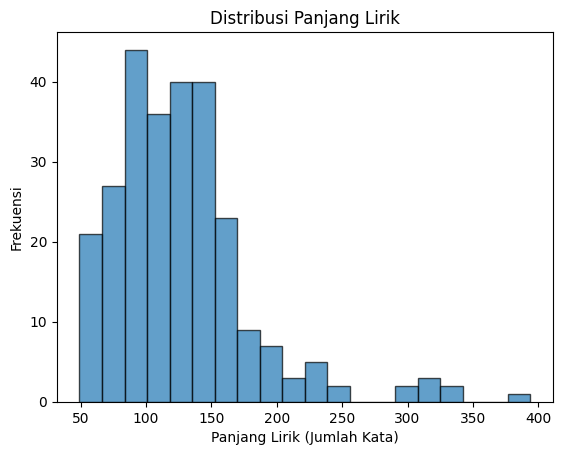

In [8]:
plt.hist(data['lyrics_length'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribusi Panjang Lirik')
plt.xlabel('Panjang Lirik (Jumlah Kata)')
plt.ylabel('Frekuensi')
plt.show()

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lyrics          265 non-null    object
 1   cleaned_lyrics  265 non-null    object
 2   lyrics_length   265 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.3+ KB
None


In [10]:
data['cleaned_lyrics'] = data['lyrics'].apply(lambda x: x['lyric'].lower() if isinstance(x, dict) and 'lyric' in x else '')
data['cleaned_lyrics'] = data['cleaned_lyrics'].fillna('')
print(data['cleaned_lyrics'].head(10))

0    disini kau dan aku\nterbiasa bersama\nmenjalan...
1    embun di pagi buta\nmenebarkan bau asa\ndetik ...
2    [verse 1]\nbagaimana mestinya\nmembuatmu jatuh...
3    betapa dalam, rasa kasihku padamu\nyang slalu ...
4    [verse 1]\nlekuk indah hadirkan pesona\nkemuli...
5    malam kehadiran cinta sambut jiwa baru\ntelah ...
6    ingin kumeraih bintang\nkuingin seperti bintan...
7    manja...kau dambaku\nselalu mengusik hatiku\ns...
8    [verse 1]\ndahulu terasa indah\ntak ingin lupa...
9    rasa cinta yang dulu tlah hilang\nkini bersemi...
Name: cleaned_lyrics, dtype: object


In [11]:
ps = PorterStemmer()
data['cleaned_lyrics'] = data['cleaned_lyrics'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned_lyrics'])

In [13]:
model = NearestNeighbors(n_neighbors=6, metric='cosine').fit(X)

In [14]:
def search_songs(query, vectorizer, X, data):
    # Transformasi query ke ruang TF-IDF yang sama
    query_vec = vectorizer.transform([query])
    
    # Menghitung kemiripan cosine antara query dan lirik lagu
    cosine_similarities = np.dot(X, query_vec.T).toarray().flatten()
    
    # Mengambil indeks lagu-lagu yang diurutkan berdasarkan kemiripan
    similar_indices = cosine_similarities.argsort()[::-1]
    
    # Mengambil lagu-lagu yang paling mirip (top_n)
    top_n = 6
    similar_songs = data.iloc[similar_indices[:top_n]]
    
    return similar_songs

In [15]:
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(model, 'reff_model.pkl')

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.


In [ ]:
from flask import Flask, render_template, request, jsonify
import joblib
import pandas as pd
from flask import Flask, send_from_directory

app = Flask(__name__)

# Load  vectorizer, model
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('reff_model.pkl')

data = pd.read_json('katalagu-indonesia-2000an.json')
data['title'] = data['lyrics'].apply(lambda x: x.get('title', 'Unknown') if isinstance(x, dict) else 'Unknown')
data['artist'] = data['lyrics'].apply(lambda x: x.get('artist', 'Unknown') if isinstance(x, dict) else 'Unknown')
data['lyric'] = data['lyrics'].apply(lambda x: x.get('lyric', 'Unknown') if isinstance(x, dict) else 'Unknown')

@app.route('/src/<path:filename>')
def serve_static(filename):
    return send_from_directory('src', filename)
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/search-reff', methods=['POST'])
def search_reff():
    query = request.json['query']
    query_vector = vectorizer.transform([query])
    distances, indices = model.kneighbors(query_vector)
    
    results = []
    for idx in indices[0]:
        song = data.iloc[idx]
        results.append({"judul": song['title'], "artist": song['artist'], "lyric": song['lyric']})
    
    return jsonify(results)

@app.route('/lyric')
def lyric():
    # Get query parameters from URL
    title = request.args.get('title')
    artist = request.args.get('artist')
    lyric = request.args.get('lyric')

    # Render the lyric page with the song data
    return render_template('lyric.html', title=title, artist=artist, lyric=lyric)
if __name__ == '__main__':
    app.run(debug=True)
